<a href="https://colab.research.google.com/github/linoscjbis80-oss/python/blob/main/Pycaret_(%ED%9A%8C%EA%B7%80)_%EC%A7%91%EA%B0%92_%EC%98%88%EC%B8%A1%EB%AA%A8%ED%98%95_fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pycaret 패키지 및 필요한 라이브러리 불러오기

In [ ]:
!pip install pycaret
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# 한글폰트 사용 in colab
!apt -qq -y install fonts-nanum

# 런타임 다시 시작 필요 없도록 캐시 리셋
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

# 나눔 폰트 설정
plt.rc('font', family='NanumBarunGothic')
mpl.rcParams['axes.unicode_minus'] = False

fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


# 파일 불러오기 및 데이터셋 정보

In [ ]:
dataset=pd.read_excel('/content/drive/MyDrive/이전 파이썬 자료/아파트(매매)_실거래가_20211115032835.xlsx')

In [ ]:
dataset

,시군구,전용면적(㎡),거래금액(만원),건축년도
0,창동,99.750,107000,1988
1,창동,95.633,95000,2001
2,창동,95.633,100000,2001
3,창동,95.633,100000,2001
4,창동,95.633,109000,2001
...,...,...,...,...
2469,도봉동,114.760,92000,2005
2470,도봉동,105.976,72000,2003
2471,도봉동,105.976,82500,2003
2472,도봉동,105.976,79000,2003


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2474 entries, 0 to 2473
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구       2474 non-null   object 
 1   전용면적(㎡)   2474 non-null   float64
 2   거래금액(만원)  2474 non-null   int64  
 3   건축년도      2474 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 77.4+ KB


# 데이터 전처리

In [ ]:
dataset.isnull().sum()

,0
시군구,0
전용면적(㎡),0
거래금액(만원),0
건축년도,0


In [ ]:
print(dataset.shape)
dataset.drop_duplicates(inplace=True)
print(dataset.shape)

(2474, 4)
(2065, 4)


In [ ]:
dataset['면적당 거래금액(만원)'] = (dataset['거래금액(만원)']/dataset['전용면적(㎡)']).round()
dataset

,시군구,전용면적(㎡),거래금액(만원),건축년도,면적당 거래금액(만원)
0,창동,99.750,107000,1988,1073.0
1,창동,95.633,95000,2001,993.0
2,창동,95.633,100000,2001,1046.0
4,창동,95.633,109000,2001,1140.0
5,창동,90.940,94000,1988,1034.0
...,...,...,...,...,...
2469,도봉동,114.760,92000,2005,802.0
2470,도봉동,105.976,72000,2003,679.0
2471,도봉동,105.976,82500,2003,778.0
2472,도봉동,105.976,79000,2003,745.0


In [ ]:
data=dataset.sample(frac=0.9,random_state=1234) # 9:1로 training
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1858, 5)
Unseen Data For Predictions: (207, 5)


# 데이터 정보 및 시각화

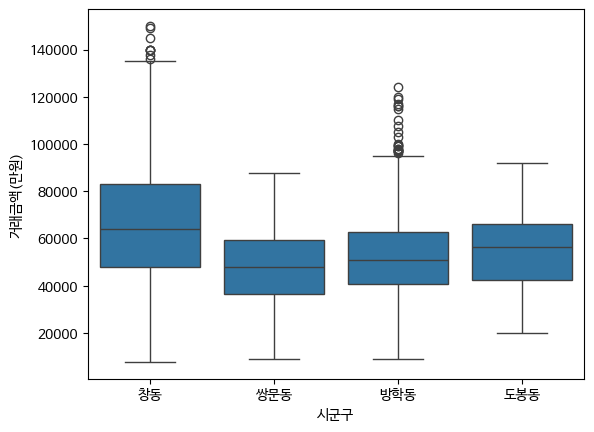

In [ ]:
plt.rc('font', family='NanumBarunGothic')
sns.boxplot(data=dataset, x='시군구', y='거래금액(만원)')
plt.savefig("boxplot.png")
plt.show()

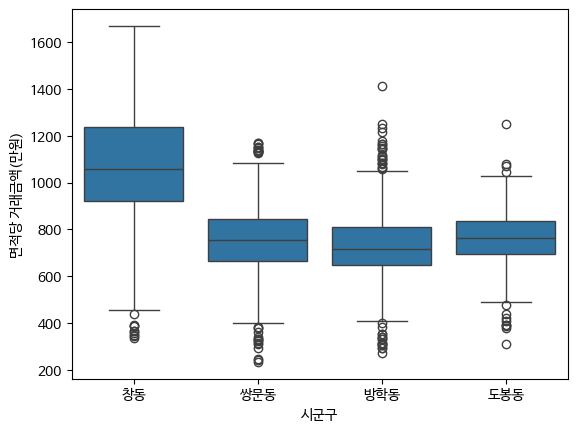

In [ ]:
sns.boxplot(data=dataset, x='시군구', y='면적당 거래금액(만원)')
plt.savefig("boxplot2.png")
plt.show()

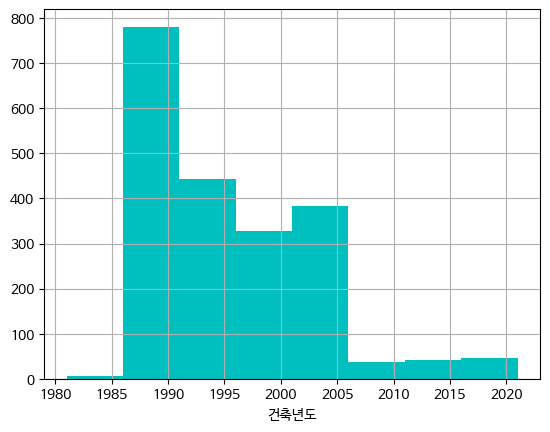

In [ ]:
plt.hist(dataset['건축년도'],color='c',bins=8)
plt.xlabel('건축년도')
plt.grid()
plt.savefig("hist.png")
plt.show()

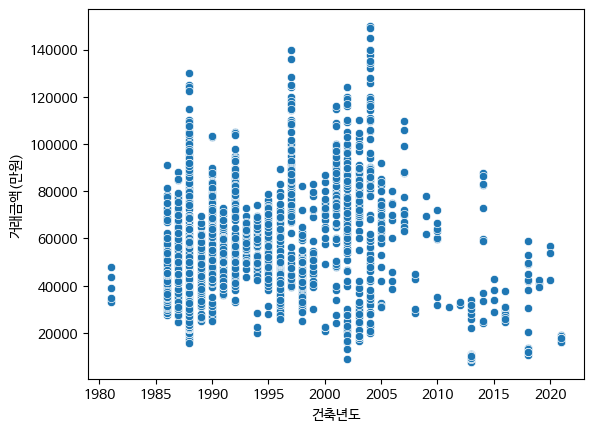

In [ ]:
sns.scatterplot(data=dataset, x='건축년도', y='거래금액(만원)')
plt.savefig("scatter.png")
plt.show()

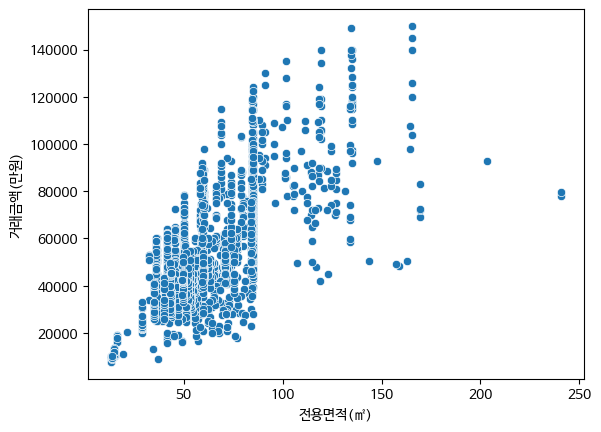

In [ ]:
sns.scatterplot(data=dataset, x='전용면적(㎡)', y='거래금액(만원)')
plt.savefig("scatter2.png")
plt.show()

In [ ]:
dataset.describe(include='all')

,시군구,전용면적(㎡),거래금액(만원),건축년도,면적당 거래금액(만원)
count,2065,2065.000000,2065.000000,2065.000000,2065.000000
unique,4,NaN,NaN,NaN,NaN
top,창동,NaN,NaN,NaN,NaN
freq,825,NaN,NaN,NaN,NaN
mean,NaN,68.017573,57449.875545,1994.842615,871.092010
std,NaN,24.514565,22277.304802,7.367428,256.598811
min,NaN,13.020000,7700.000000,1981.000000,233.000000
25%,NaN,49.940000,42000.000000,1989.000000,697.000000
50%,NaN,65.370000,55000.000000,1993.000000,820.000000
75%,NaN,84.870000,70000.000000,2000.000000,1029.000000


In [ ]:
groupdata=dataset.groupby('시군구')
groupdata.size()

,0
시군구,
도봉동,247
방학동,487
쌍문동,506
창동,825


# Pycaret 세팅

In [ ]:
from pycaret.regression import *
exp_reg=setup(data=data, target="거래금액(만원)",normalize=True, transformation=True,
          remove_multicollinearity=True, multicollinearity_threshold=0.9,session_id=123)

,Description,Value
0,Session id,123
1,Target,거래금액(만원)
2,Target type,Regression
3,Original data shape,"(1858, 5)"
4,Transformed data shape,"(1858, 8)"
5,Transformed train set shape,"(1300, 8)"
6,Transformed test set shape,"(558, 8)"
7,Numeric features,3
8,Categorical features,1
9,Preprocess,True


# Top3 모델

In [ ]:
top3=compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,496.3844,2748648.9133,1524.9465,0.9942,0.0267,0.0096,0.3230
rf,Random Forest Regressor,841.7172,4479743.1825,1990.7148,0.9905,0.0375,0.0167,0.4130
xgboost,Extreme Gradient Boosting,960.3069,4714535.2819,2068.3376,0.9901,0.0368,0.0186,0.1490
gbr,Gradient Boosting Regressor,1337.0211,4840724.9727,2135.6320,0.9896,0.0389,0.0254,0.2180
lightgbm,Light Gradient Boosting Machine,1147.2908,6354653.3167,2479.0631,0.9864,0.0480,0.0227,0.4900
knn,K Neighbors Regressor,1367.9094,7411108.8647,2708.6371,0.9841,0.0530,0.0275,0.1130
dt,Decision Tree Regressor,1228.6208,8721570.8377,2899.7571,0.9811,0.0477,0.0230,0.0820
lr,Linear Regression,3276.9549,25874563.8226,5059.3459,0.9443,0.1843,0.0764,0.9120
lar,Least Angle Regression,3389.2695,27770244.5927,5237.2336,0.9405,0.2223,0.0810,0.0850
llar,Lasso Least Angle Regression,3389.2683,27770098.8182,5237.2327,0.9405,0.2213,0.0810,0.0850


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

In [ ]:
print(top3)

[ExtraTreesRegressor(n_jobs=-1, random_state=123), RandomForestRegressor(n_jobs=-1, random_state=123), XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=-1, num_parallel_tree=None, ...)]


# Top3 모델 생성 및 튜닝

In [ ]:
et1=create_model('et',fold=5)
xgboost1=create_model('xgboost',fold=5)
gbr1=create_model('gbr',fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,625.6393,2660445.7412,1631.0873,0.9945,0.0265,0.0114
1,543.0088,1846389.7371,1358.8192,0.9962,0.0386,0.0128
2,688.8758,6064650.8377,2462.6512,0.9859,0.0352,0.0106
3,564.2777,2327383.1859,1525.5763,0.9951,0.0290,0.0109
4,438.6445,3491043.1028,1868.4333,0.9928,0.0312,0.0091
Mean,572.0892,3277982.5209,1769.3135,0.9929,0.0321,0.0109
Std,83.9296,1493007.9563,384.0734,0.0037,0.0043,0.0012


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1097.4390,4432391.4810,2105.3246,0.9908,0.0370,0.0212
1,906.5763,3195773.3430,1787.6726,0.9934,0.0399,0.0187
2,1046.6220,6322661.8064,2514.4904,0.9853,0.0449,0.0194
3,1028.7587,3549561.1474,1884.0279,0.9925,0.0312,0.0182
4,1103.9547,8630755.4827,2937.8147,0.9822,0.0466,0.0211
Mean,1036.6701,5226228.6521,2245.8660,0.9888,0.0399,0.0197
Std,71.1422,2017776.4366,426.9829,0.0043,0.0055,0.0012


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1448.3839,4985774.1279,2232.8847,0.9897,0.0432,0.0281
1,1376.5182,4374938.6011,2091.6354,0.9909,0.0398,0.0262
2,1383.0744,6132969.9268,2476.4834,0.9857,0.0437,0.0254
3,1424.0729,4127684.7108,2031.6704,0.9913,0.0332,0.0249
4,1302.3007,5190476.1561,2278.2617,0.9893,0.0443,0.0264
Mean,1386.8700,4962368.7045,2222.1871,0.9894,0.0409,0.0262
Std,49.8829,702091.0967,155.7342,0.0020,0.0041,0.0011


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tune_et=tune_model(et1,optimize='R2')
tune_xgboost=tune_model(xgboost1,optimize='R2')
tune_gbr=tune_model(gbr1,optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2484.8720,18222238.2302,4268.7514,0.9674,0.1020,0.0594
1,1953.2270,7727033.0119,2779.7541,0.9810,0.0591,0.0408
2,2272.0745,13589182.6821,3686.3509,0.9682,0.0965,0.0535
3,2694.0171,23135935.6891,4809.9829,0.9565,0.1061,0.0615
4,2366.8731,20980769.3560,4580.4770,0.9549,0.1053,0.0517
5,2551.7703,21746410.0512,4663.3046,0.9443,0.0940,0.0543
6,2629.7613,20041753.9467,4476.8018,0.9612,0.0995,0.0587
7,1988.3378,11160181.9079,3340.6858,0.9740,0.0606,0.0375
8,2026.2126,12337200.2742,3512.4351,0.9722,0.0773,0.0423


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1612.9127,9322490.4964,3053.2754,0.9833,0.0662,0.0335
1,784.0740,1538825.4788,1240.4940,0.9962,0.0252,0.0156
2,1056.3626,3344066.6178,1828.6789,0.9922,0.0354,0.0194
3,1226.4985,4247843.8466,2061.0298,0.9920,0.0551,0.0281
4,1162.8708,5294396.4770,2300.9556,0.9886,0.0337,0.0193
5,1298.4128,10149171.0978,3185.7764,0.9740,0.0576,0.0248
6,1067.3487,2757971.6647,1660.7142,0.9947,0.0330,0.0206
7,1165.1698,3208232.3403,1791.1539,0.9925,0.0390,0.0221
8,1056.9134,2774672.6893,1665.7349,0.9937,0.0284,0.0189


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1208.6124,4947289.0963,2224.2502,0.9911,0.0391,0.0234
1,953.2901,3288331.0123,1813.3756,0.9919,0.0327,0.0186
2,893.0507,2794689.3454,1671.7324,0.9935,0.0312,0.0171
3,827.0483,1495267.1022,1222.8111,0.9972,0.0383,0.0200
4,1025.8444,2975183.9228,1724.8721,0.9936,0.0273,0.0179
5,1001.3149,4344330.0063,2084.3056,0.9889,0.0365,0.0186
6,915.1505,1841196.9989,1356.9071,0.9964,0.0280,0.0179
7,969.7118,2339866.6998,1529.6623,0.9946,0.0294,0.0180
8,928.0308,2109369.9639,1452.3670,0.9952,0.0276,0.0175


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


# Top3 모델 blend

In [ ]:
blend_model = blend_models([tune_et,tune_xgboost,tune_gbr])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,777.8571,3313339.3870,1820.2581,0.9941,0.0313,0.0152
1,488.6141,731282.8422,855.1508,0.9982,0.0154,0.0093
2,417.6706,804311.4198,896.8341,0.9981,0.0141,0.0078
3,655.5205,1876398.2224,1369.8169,0.9965,0.0425,0.0166
4,579.5779,1870210.1864,1367.5563,0.9960,0.0246,0.0107
5,767.2560,4896192.4863,2212.7342,0.9875,0.0393,0.0147
6,588.2390,1450373.6814,1204.3146,0.9972,0.0255,0.0122
7,544.5542,914914.7574,956.5118,0.9979,0.0150,0.0092
8,481.4799,671282.8155,819.3185,0.9985,0.0125,0.0084


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

# blend 모델 시각화

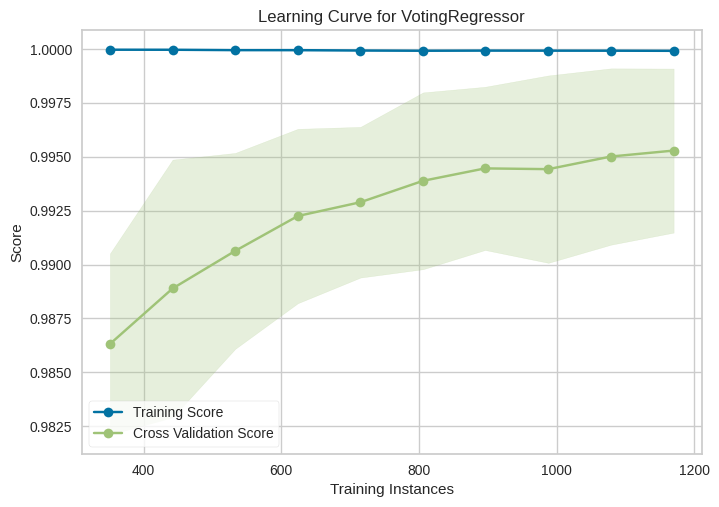

In [ ]:
plot_model(blend_model,plot='learning')

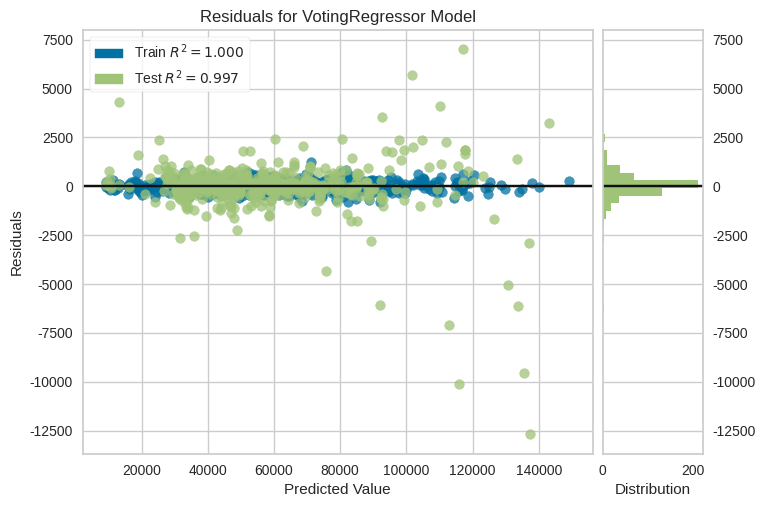

In [ ]:
plot_model(blend_model)

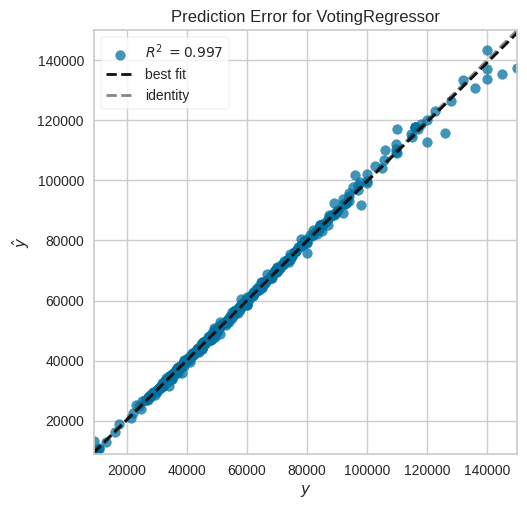

In [ ]:
plot_model(blend_model, plot = 'error')

# 모델 테스트

In [ ]:
unseen_prediction=predict_model(blend_model, data=data_unseen)
unseen_prediction

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,568.4222,2225094.8071,1491.6752,0.9952,0.0333,0.0135


,시군구,전용면적(㎡),건축년도,면적당 거래금액(만원),거래금액(만원),prediction_label
0,창동,95.633003,2001,1140.0,109000,108732.440325
1,창동,89.449997,1988,906.0,81000,80117.576652
2,창동,89.449997,1988,993.0,88800,88209.155181
3,창동,89.449997,1988,1118.0,100000,100531.453413
4,창동,84.995003,2003,888.0,75500,75491.373501
...,...,...,...,...,...,...
202,도봉동,49.770000,1996,1045.0,52000,50159.865124
203,도봉동,49.070000,1996,866.0,42500,42873.096184
204,도봉동,40.020000,1996,775.0,31000,31155.225046
205,도봉동,40.020000,1996,837.0,33500,33185.569038


In [ ]:
# MAE
from pycaret.utils.generic import check_metric
check_metric(unseen_prediction["거래금액(만원)"],unseen_prediction["prediction_label"], metric="MAE")

568.4222

In [ ]:
# MSE
from pycaret.utils.generic import check_metric
check_metric(unseen_prediction["거래금액(만원)"],unseen_prediction["prediction_label"],metric="MSE")

2225094.8071

In [ ]:
# RMSE
from pycaret.utils.generic import check_metric
check_metric(unseen_prediction["거래금액(만원)"],unseen_prediction["prediction_label"],metric="RMSE")

1491.6752

In [ ]:
# R2
from pycaret.utils.generic import check_metric
check_metric(unseen_prediction["거래금액(만원)"],unseen_prediction["prediction_label"], metric="R2")

0.9952

In [ ]:
# RMSLE
from pycaret.utils.generic import check_metric
check_metric(unseen_prediction["거래금액(만원)"],unseen_prediction["prediction_label"], metric="RMSLE")

0.0333

In [ ]:
# MAPE
from pycaret.utils.generic import check_metric
check_metric(unseen_prediction["거래금액(만원)"],unseen_prediction["prediction_label"], metric="MAPE")

0.0135